In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

### Cargamos la data

In [2]:
red1 = [pd.read_csv('../datas/data_dante0.csv'), pd.read_csv('../datas/data_dante1.csv')]
red2 = [pd.read_csv('../datas/data_roni0.csv'), pd.read_csv('../datas/data_roni1.csv')]
red3 = [pd.read_csv('../datas/data_fede0.csv'), pd.read_csv('../datas/data_fede1.csv')]
red4 = [pd.read_csv('../datas/data_charly0.csv'), pd.read_csv('../datas/data_charly1.csv')]

from matplotlib import cm
color = cm.inferno_r(np.linspace(.60, .05, 10))

redes = ["Red 1", "Red 2", "Red 3", "Red 4"]

- Introduccion de las redes con un grafico solo de info y bla
- Entropia
    - Entropia per se
    - Analisis de simbolos
- Protocolo
    - Analisis de protocolos
    - Fibertel vs telecentro
- Broadcatunicast

In [3]:
def column_calculator(dfs, column):
    variables = set([row[column] for df in dfs for _, row in df.iterrows()])
    d = dict.fromkeys(variables, 0)
    for df in dfs:
        for _, row in df.iterrows():
            d[row[column]] += row.Probabilidad
    d.update((k, val/len(dfs)) for k, val in d.items())
    return d

In [4]:
def fix_df(df):
    df[['Transmision','Protocolo']] = df.Evento.str.replace(
                                "(", "").str.replace(
                                ")","").str.replace(
                                "'", "").str.split(", ",expand=True,)
    df = df.drop(columns=["Evento"])
    return df

red1 = [fix_df(df) for df in red1]
red2 = [fix_df(df) for df in red2]
red3 = [fix_df(df) for df in red3]
red4 = [fix_df(df) for df in red4]

### Introduccion

In [5]:
import math

def prom(dfs):
    variables = set([(row["Transmision"], row["Protocolo"]) for df in dfs for _, row in df.iterrows()])
    d = dict.fromkeys(variables, 0)
    for df in dfs:
        for _, row in df.iterrows():
            d[(row["Transmision"], row["Protocolo"])] += row.Probabilidad
    d.update((k, -math.log2(val/len(dfs))) for k, val in d.items())
    return d
    
prom_1 = prom(red1)
prom_2 = prom(red2)
prom_3 = prom(red3)
prom_4 = prom(red4)

proms = [prom_1, prom_2, prom_3, prom_4]

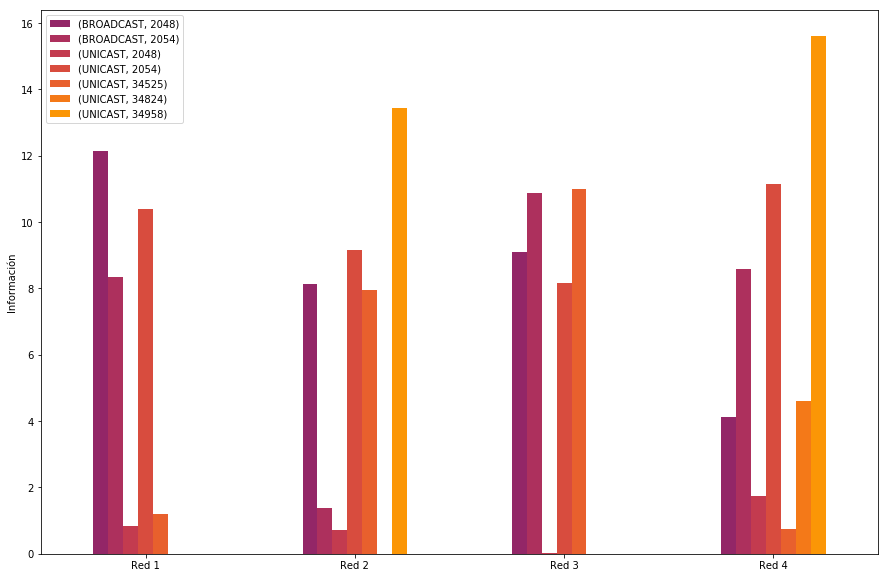

In [6]:
prom_df = pd.DataFrame(proms).fillna(0)
prom_df.index = redes
ax = prom_df.plot.bar(rot=0, figsize=(15,10), color=color)
ax.set_ylabel("Información")
plt.show()

### Entropia

#### La entropia

In [7]:
def entropia(df):
    return sum([row.Probabilidad * row.Informacion for _, row in df.iterrows()])
        
ent_red1 = [entropia(df) for df in red1]
ent_red2 = [entropia(df) for df in red2]
ent_red3 = [entropia(df) for df in red3]
ent_red4 = [entropia(df) for df in red4]

entropias = [ent_red1, ent_red2, ent_red3, ent_red4]

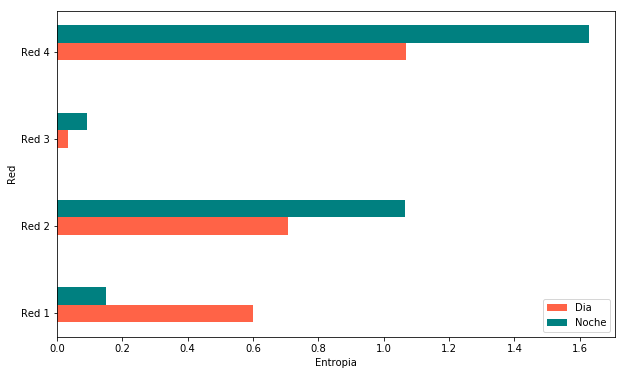

In [8]:
ent = pd.DataFrame(entropias, columns=["Dia","Noche"])
ent.index = redes

fig, ax = plt.subplots(figsize=(10, 6))

bar_size = 0.2
padding = 0.2

x_locs = np.arange(len(ent))
y_locs = np.arange(len(ent))

ax.barh(y_locs, ent.Dia, height=bar_size, color='tomato', label="Dia")
ax.barh(y_locs + bar_size, ent.Noche, height=bar_size, color='teal', label="Noche")
ax.set(yticks=x_locs, yticklabels=ent.index)

plt.ylabel("Red")
plt.xlabel("Entropia")
plt.legend()
plt.show()

#### Relación con los simbolos

In [ ]:
# TODO

### Protocolo

#### Analisis general protocolo

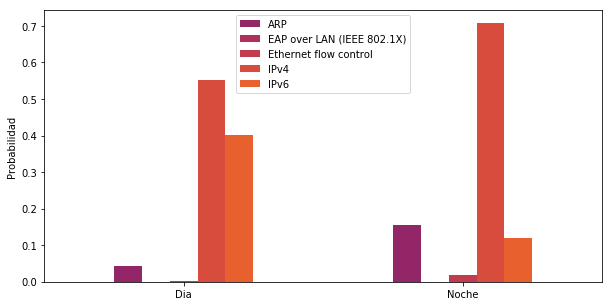

In [22]:
def redefinir_protocolos(d):
    new_d = {}
    new_d['IPv4'] = d.get('2048',0)
    new_d['IPv6'] = d.get('34525',0)
    new_d['ARP'] = d.get('2054',0)
    new_d['Ethernet flow control'] = d.get('34824',0)
    new_d['EAP over LAN (IEEE 802.1X)'] = d.get('34958',0)
    
    assert len(d.keys()) <= len(new_d.keys())
    
    return new_d
    
protocolo_d = redefinir_protocolos(column_calculator([red1[0], red2[0], red3[0], red4[0]], "Protocolo"))
protocolo_n = redefinir_protocolos(column_calculator([red1[1], red2[1], red3[1], red4[1]], "Protocolo"))

protocolo_df = pd.DataFrame([protocolo_d, protocolo_n])
protocolo_df.index = ["Dia", "Noche"]
ax = protocolo_df.plot.bar(rot=0, figsize=(10,5), color=color)
ax.set_ylabel("Probabilidad")
plt.show()

#### Analisis servicio

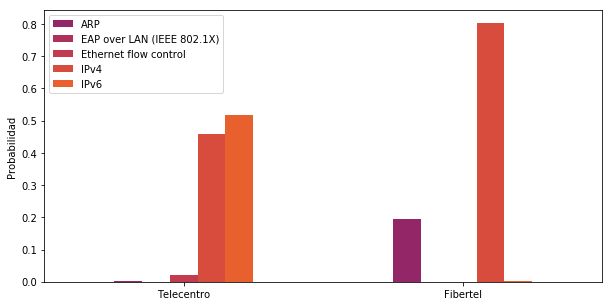

In [25]:
protocolo_t = redefinir_protocolos(column_calculator([red1[0], red1[1], red4[0], red4[1]], "Protocolo"))
protocolo_f = redefinir_protocolos(column_calculator([red2[0], red2[1], red3[0], red3[1]], "Protocolo"))

protocolo_df = pd.DataFrame([protocolo_t, protocolo_f])
protocolo_df.index = ["Telecentro", "Fibertel"]
ax = protocolo_df.plot.bar(rot=0, figsize=(10,5), color=color)
ax.set_ylabel("Probabilidad")
plt.show()

### Broadcast vs unicast

In [11]:
uni_broad_d = column_calculator([red1[0], red2[0], red3[0], red4[0]], "Transmision")
uni_broad_n = column_calculator([red1[1], red2[1], red3[1], red4[1]], "Transmision")
uni_broad = [uni_broad_d, uni_broad_n]

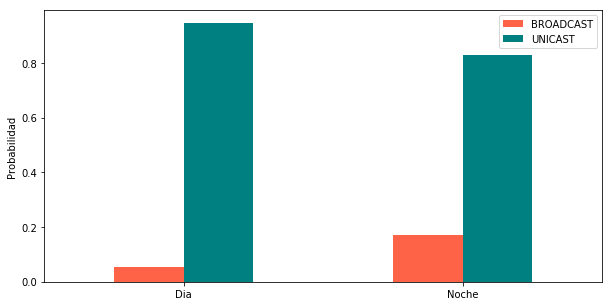

In [12]:
uni_vs_broad = pd.DataFrame(uni_broad)
uni_vs_broad.index = ["Dia", "Noche"]
ax = uni_vs_broad.plot.bar(rot=0, figsize=(10,5), color=["tomato", "teal"])
ax.set_ylabel("Probabilidad")
plt.show()